<a href="https://colab.research.google.com/github/payaljain2003/fastai/blob/main/bird_not_a_bird_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Bird and Fish images

In [1]:
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00


In [2]:

from duckduckgo_search import ddg_images
from fastcore.all import *

In [3]:
def search_images(term, max_images=200):
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [9]:
urls = search_images('bird photos', max_images=1)
urls[0]


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://1.bp.blogspot.com/-dFmzBPiEmnY/USEW5WsoZII/AAAAAAAAATE/42pzceCRDYY/s1600/fishes+(17).jpg'

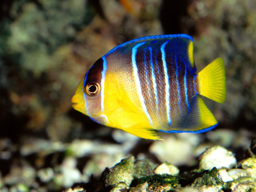

In [10]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)



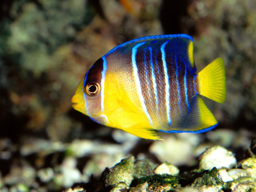

In [12]:
download_url(search_images('fish photos', max_images=1)[0], 'fish.jpg', show_progress=False)
Image.open('fish.jpg').to_thumb(256,256)

In [15]:
searches = 'fish','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} water photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'pet {o} photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

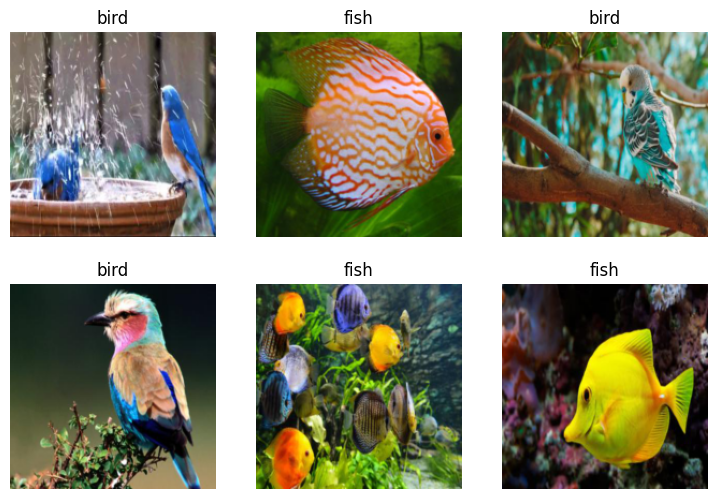

In [19]:
dls.show_batch(max_n=6)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 98.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.773059,0.210019,0.080808,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.109821,0.085124,0.030303,01:29
1,0.071468,0.096735,0.020202,01:30
2,0.047800,0.100974,0.020202,01:33


In [23]:
is_bird,_,probs = learn.predict(PILImage.create('fish.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: fish.
Probability it's a bird: 0.0000
